In [174]:
#Projeto: Será que comprar ações na máxima histórica seria uma armadilha ou uma oportunidade em investir?

#Vamos fazer uma abordagem por até 3 dias e analisar se ela tende a romper a máxima, ou recuar para uma média.

In [175]:
#É hora de importar as bibliotecas...

In [176]:
!pip install mplcyberpunk

In [177]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import mplcyberpunk
from matplotlib.ticker import FuncFormatter 

plt.style.use("cyberpunk")

In [178]:
#Vamos buscar os dados de cotação do Yahoo Finance 

In [179]:
ticker = "WEGE3.SA" 
periodo_de_hold = 3 

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

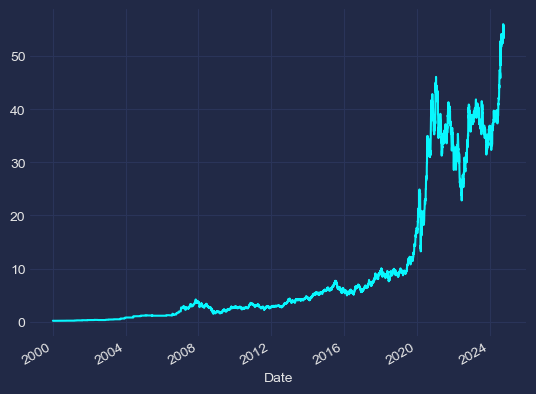

In [180]:
dados = yf.download(ticker) 

dados["Close"].plot()

In [181]:
dados

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200
...,...,...,...,...,...,...
2024-10-03,54.759998,55.000000,53.950001,54.599998,54.599998,4470600
2024-10-04,54.360001,54.980000,54.259998,54.500000,54.500000,4819200
2024-10-07,54.650002,54.709999,53.360001,53.400002,53.400002,5409300


In [182]:
#Preparar e calcular dados importantes para o modelo

In [183]:
dados["retorno"] = dados["Adj Close"].pct_change()

In [184]:
dados["maxima_historica"] = dados["Close"].cummax()

dados

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica
Date,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120,-0.090910,0.168639
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200,0.000000,0.168639
...,...,...,...,...,...,...,...,...
2024-10-03,54.759998,55.000000,53.950001,54.599998,54.599998,4470600,-0.013550,56.049999
2024-10-04,54.360001,54.980000,54.259998,54.500000,54.500000,4819200,-0.001831,56.049999
2024-10-07,54.650002,54.709999,53.360001,53.400002,53.400002,5409300,-0.020183,56.049999


In [185]:
dados["maxima_historica_sinal_compra"] = dados["maxima_historica"].shift(1)
dados["maxima_historica_stop_venda"] = dados["maxima_historica"].shift(periodo_de_hold)

dados.head(50)

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda
Date,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,0.168639,NaN
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,0.168639,NaN
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120,-0.090910,0.168639,0.168639,0.168639
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200,0.000000,0.168639,0.168639,0.168639
2000-01-10,0.147928,0.147928,0.147928,0.147928,0.105167,0,0.000000,0.168639,0.168639,0.168639
2000-01-11,0.149408,0.149408,0.147928,0.147928,0.105167,1568320,0.000000,0.168639,0.168639,0.168639
2000-01-12,0.150887,0.150887,0.150887,0.150887,0.107271,2109120,0.020003,0.168639,0.168639,0.168639
2000-01-13,0.153846,0.162721,0.150887,0.153846,0.109374,1237080,0.019611,0.168639,0.168639,0.168639


In [186]:
dados.tail(50)

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda
Date,,,,,,,,,,
2024-08-01,50.599998,52.930000,50.029999,52.840000,52.575256,13624400,0.043032,52.840000,50.660000,47.400002
2024-08-02,52.650002,52.840000,49.669998,49.820000,49.570389,15383100,-0.057154,52.840000,52.840000,47.400002
2024-08-05,48.000000,49.430000,47.570000,48.860001,48.798908,10892300,-0.015563,52.840000,52.840000,50.660000
2024-08-06,49.310001,49.310001,48.320000,48.970001,48.908772,5361900,0.002251,52.840000,52.840000,52.840000
2024-08-07,49.119999,49.139999,48.169998,48.320000,48.259583,4746100,-0.013273,52.840000,52.840000,52.840000
2024-08-08,48.299999,50.150002,48.250000,49.689999,49.627869,6144900,0.028353,52.840000,52.840000,52.840000
2024-08-09,49.770000,50.099998,48.689999,49.700001,49.637856,7694400,0.000201,52.840000,52.840000,52.840000
2024-08-12,50.070000,50.770000,49.790001,50.580002,50.516758,8193400,0.017706,52.840000,52.840000,52.840000
2024-08-13,50.980000,52.290001,50.820000,51.130001,51.066071,10203100,0.010874,52.840000,52.840000,52.840000


In [187]:
#Agora vamos gerar sinais de Compra! O objetivo quando estamos fazendo um modelo de compra e venda baseado em sinais é criar uma coluna 0, 1 ou -1.
#Isso nos ajuda a indicar qual seria a nosso posicionamento no ativo em um determinado período. 
#Criando esta coluna, basta multiplicar pela coluna de retorno para chegar no retorno final do modelo. 


#Se for 0: significa que estamos FORA DO MERCADO. 
#Se for 1: significa que estamos COMPRADO na ação. 
#Se for -1: significa que estamos VENDIDO na ação.

In [188]:
dados["sinais"] = 0

In [189]:
dados["sinais"] = (dados["maxima_historica"] != dados["maxima_historica_sinal_compra"]).astype(int)

dados.tail(50)

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda,sinais
Date,,,,,,,,,,,
2024-08-01,50.599998,52.930000,50.029999,52.840000,52.575256,13624400,0.043032,52.840000,50.660000,47.400002,1
2024-08-02,52.650002,52.840000,49.669998,49.820000,49.570389,15383100,-0.057154,52.840000,52.840000,47.400002,0
2024-08-05,48.000000,49.430000,47.570000,48.860001,48.798908,10892300,-0.015563,52.840000,52.840000,50.660000,0
2024-08-06,49.310001,49.310001,48.320000,48.970001,48.908772,5361900,0.002251,52.840000,52.840000,52.840000,0
2024-08-07,49.119999,49.139999,48.169998,48.320000,48.259583,4746100,-0.013273,52.840000,52.840000,52.840000,0
2024-08-08,48.299999,50.150002,48.250000,49.689999,49.627869,6144900,0.028353,52.840000,52.840000,52.840000,0
2024-08-09,49.770000,50.099998,48.689999,49.700001,49.637856,7694400,0.000201,52.840000,52.840000,52.840000,0
2024-08-12,50.070000,50.770000,49.790001,50.580002,50.516758,8193400,0.017706,52.840000,52.840000,52.840000,0
2024-08-13,50.980000,52.290001,50.820000,51.130001,51.066071,10203100,0.010874,52.840000,52.840000,52.840000,0


In [190]:
#Agora vamos visualizar gráficos e máximas históricas

In [191]:
dias_maxima = dados[dados["sinais"] == 1]["Close"]

dias_maxima

Date
2000-01-03     0.168639
2000-09-28     0.174556
2001-03-13     0.207100
2001-04-24     0.235207
2001-08-14     0.266272
                ...    
2024-08-22    54.200001
2024-09-23    54.320000
2024-09-24    55.389999
2024-09-25    55.680000
2024-09-26    56.049999
Name: Close, Length: 236, dtype: float64

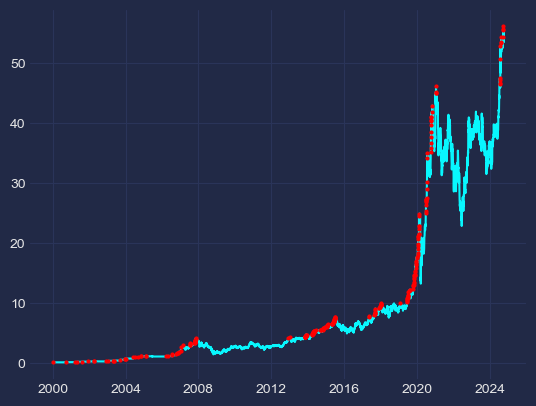

In [192]:
fig, ax = plt.subplots()

ax.scatter(dias_maxima.index, dias_maxima.values, color = "red", s = 4, zorder = 2)
ax.plot(dados.index, dados["Close"].values, zorder = 1)

In [193]:
#Agora vamos gerar os sinais de Vendas

In [194]:
dados["sinais"] = np.where(dados["sinais"] == 0, np.where(dados["maxima_historica"] != dados["maxima_historica_stop_venda"], 1, 0), 
                           dados["sinais"])

dados

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda,sinais
Date,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,0.168639,NaN,1
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,0.168639,NaN,1
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120,-0.090910,0.168639,0.168639,0.168639,0
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200,0.000000,0.168639,0.168639,0.168639,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-03,54.759998,55.000000,53.950001,54.599998,54.599998,4470600,-0.013550,56.049999,56.049999,56.049999,0
2024-10-04,54.360001,54.980000,54.259998,54.500000,54.500000,4819200,-0.001831,56.049999,56.049999,56.049999,0
2024-10-07,54.650002,54.709999,53.360001,53.400002,53.400002,5409300,-0.020183,56.049999,56.049999,56.049999,0


In [195]:
#Criando um ID para todos os trades históricos da tabela

In [196]:
dados["trades"] = (dados["sinais"] != dados["sinais"].shift()).cumsum() 

dados.head(202)

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda,sinais,trades
Date,,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1,1
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,0.168639,NaN,1,1
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,0.168639,NaN,1,1
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120,-0.090910,0.168639,0.168639,0.168639,0,2
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200,0.000000,0.168639,0.168639,0.168639,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2000-10-04,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.174556,0.174556,0,4
2000-10-05,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.174556,0.174556,0,4
2000-10-06,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.174556,0.174556,0,4


In [197]:
dados["trades"] = dados["trades"].where(dados["sinais"] == 1)

dados

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda,sinais,trades
Date,,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1,1.0
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,0.168639,NaN,1,1.0
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,0.168639,NaN,1,1.0
2000-01-06,0.147928,0.147928,0.147928,0.147928,0.105167,250120,-0.090910,0.168639,0.168639,0.168639,0,NaN
2000-01-07,0.149408,0.149408,0.147928,0.147928,0.105167,135200,0.000000,0.168639,0.168639,0.168639,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-03,54.759998,55.000000,53.950001,54.599998,54.599998,4470600,-0.013550,56.049999,56.049999,56.049999,0,NaN
2024-10-04,54.360001,54.980000,54.259998,54.500000,54.500000,4819200,-0.001831,56.049999,56.049999,56.049999,0,NaN
2024-10-07,54.650002,54.709999,53.360001,53.400002,53.400002,5409300,-0.020183,56.049999,56.049999,56.049999,0,NaN


In [198]:
#Colocando somente os trades feitos na tela

In [199]:
dados = dados.dropna(subset = "trades")

dados.head(50)

,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda,sinais,trades
Date,,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1,1.0
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,0.168639,NaN,1,1.0
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,0.168639,NaN,1,1.0
2000-09-28,0.174556,0.174556,0.174556,0.174556,0.124098,6760,0.044251,0.174556,0.168639,0.168639,1,3.0
2000-09-29,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.174556,0.168639,1,3.0
2000-10-02,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.174556,0.168639,1,3.0
2001-03-13,0.207100,0.207100,0.207100,0.207100,0.147234,13520,0.186439,0.207100,0.174556,0.174556,1,5.0
2001-03-14,0.207100,0.207100,0.207100,0.207100,0.147234,13520,0.000000,0.207100,0.207100,0.174556,1,5.0
2001-03-15,0.207100,0.207100,0.207100,0.207100,0.147234,0,0.000000,0.207100,0.207100,0.174556,1,5.0


In [200]:
#Agora vamos calcular os retornos de todos os trades

In [201]:
dados["retorno_cota"] = 1 + dados["retorno"] 

C:\Users\VINICIUS\AppData\Local\Temp\ipykernel_6812\2705243907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["retorno_cota"] = 1 + dados["retorno"]


In [202]:
dados["rentabilidade_trades"] = dados.groupby("trades")["retorno_cota"].cumprod() - 1 

dados

C:\Users\VINICIUS\AppData\Local\Temp\ipykernel_6812\2556213668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["rentabilidade_trades"] = dados.groupby("trades")["retorno_cota"].cumprod() - 1


,Open,High,Low,Close,Adj Close,Volume,retorno,maxima_historica,maxima_historica_sinal_compra,maxima_historica_stop_venda,sinais,trades,retorno_cota,rentabilidade_trades
Date,,,,,,,,,,,,,,
2000-01-03,0.168639,0.170118,0.168639,0.168639,0.119891,378560,NaN,0.168639,NaN,NaN,1,1.0,NaN,NaN
2000-01-04,0.164201,0.164201,0.162721,0.162721,0.115684,47320,-0.035092,0.168639,0.168639,NaN,1,1.0,0.964908,-0.035092
2000-01-05,0.162721,0.162721,0.162721,0.162721,0.115684,0,0.000000,0.168639,0.168639,NaN,1,1.0,1.000000,-0.035092
2000-09-28,0.174556,0.174556,0.174556,0.174556,0.124098,6760,0.044251,0.174556,0.168639,0.168639,1,3.0,1.044251,0.044251
2000-09-29,0.174556,0.174556,0.174556,0.174556,0.124098,0,0.000000,0.174556,0.174556,0.168639,1,3.0,1.000000,0.044251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,54.500000,55.779999,54.470001,55.389999,55.320740,8896000,0.019698,55.389999,54.320000,54.200001,1,165.0,1.019698,0.054646
2024-09-25,55.549999,55.860001,55.049999,55.680000,55.610378,6674000,0.005236,55.680000,55.389999,54.200001,1,165.0,1.005236,0.060168
2024-09-26,55.799999,56.139999,55.209999,56.049999,55.979916,5616900,0.006645,56.049999,55.680000,54.320000,1,165.0,1.006645,0.067212


In [203]:
dados = dados.sort_index(ascending = False) 
dados = dados.drop_duplicates("trades") 
dados = dados.sort_index(ascending = True)
dados = dados.dropna()

dados = dados[["trades", "rentabilidade_trades"]] 

dados

,trades,rentabilidade_trades
Date,,
2000-10-02,3.0,0.044251
2001-03-15,5.0,0.186439
2001-04-26,7.0,0.135717
2001-08-16,9.0,0.184209
2001-12-03,11.0,0.147059
...,...,...
2021-01-20,157.0,0.047720
2024-07-22,159.0,0.028117
2024-08-05,161.0,0.069442


In [204]:
#Por fim, vamos calcular as estatísticas do nosso modelo de investimento (EV, Trades assertivos, Rentabilidade acumulada)

In [205]:
rentabilidade_acumulada = ((1 + dados["rentabilidade_trades"]).cumprod() - 1).iloc[-1] 

trades_certos = (len(dados[dados["rentabilidade_trades"] > 0]))/len(dados["rentabilidade_trades"]) 
trades_errados = 1 - trades_certos
media_ganhos = dados[dados["rentabilidade_trades"] > 0]["rentabilidade_trades"].mean()
media_perdas = dados[dados["rentabilidade_trades"] <= 0]["rentabilidade_trades"].mean()

EV = (trades_certos * media_ganhos) - (trades_errados * abs(media_perdas))

In [206]:
print(f''' 
Rentabilidade Acumulada: {rentabilidade_acumulada}
Trades Certos: {trades_certos}
EV: {EV} 

''')

 
Rentabilidade Acumulada: 270.6660817320174
Trades Certos: 0.9024390243902439
EV: 0.07374120429469984 




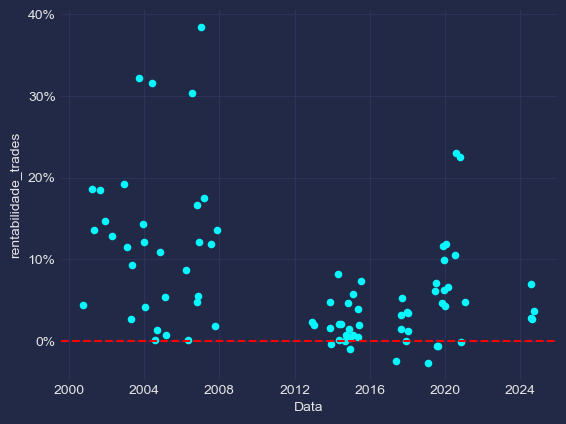

In [207]:
scatter = dados["rentabilidade_trades"].to_frame()
scatter = scatter.reset_index()
scatter.columns = ["Data", "rentabilidade_trades"]
ax = scatter.plot(x = "Data", y = "rentabilidade_trades", kind = "scatter")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
ax.axhline(y=0, color = "red", linestyle = '--')

In [208]:
#Plus: Podendo alterar para qualquer Ação (na linha '9') que o modelo de análise está pronto!